# Part I : Data Preprocessing

### 1) Dataset : Penguins Dataset

1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

2. Read, preprocess and analyze the main statistics of the dataset

In [2]:
penguin_data = pd.read_csv("./datasets/penguins.csv")

print(f"Shape of Penguin data is {penguin_data.shape}")

penguin_data[:5]

Shape of Penguin data is (344, 10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


3. Handling missing values

In [3]:
# Function to print missing Nan values for each column in given dataframe

def print_nan(df):
    for c in df.columns:
        print(c, df[c].isna().sum())

In [4]:
print_nan(penguin_data)

species 11
island 10
calorie requirement 0
average sleep duration 0
bill_length_mm 7
bill_depth_mm 11
flipper_length_mm 8
body_mass_g 5
gender 17
year 2


In [5]:
# Drop or replace missing values
# We can drop 'speices' and 'gender' columns with missing entries as it is not correct to replace them
penguin_data = penguin_data.dropna(subset=["species", "gender"])

# For island and gender column, we can replace NaN with 'na' 
# Reusing my code from Assignment 0, Part 5
penguin_data["island"] = penguin_data["island"].fillna("na") 

# For rest of the column (bill length, bill depth, flipper length, body mass, and year) we can replace NaN with its median value 
# Reusing my code from previous Assignment 0, Part 5
penguin_data["bill_length_mm"] = penguin_data["bill_length_mm"].fillna(penguin_data["bill_length_mm"].median()) 
penguin_data["bill_depth_mm"] = penguin_data["bill_depth_mm"].fillna(penguin_data["bill_depth_mm"].median()) 
penguin_data["flipper_length_mm"] = penguin_data["flipper_length_mm"].fillna(penguin_data["flipper_length_mm"].median()) 
penguin_data["body_mass_g"] = penguin_data["body_mass_g"].fillna(penguin_data["body_mass_g"].median()) 
penguin_data["year"] = penguin_data["year"].fillna(penguin_data["year"].median()) 

4. Handling mismatched string formats

In [6]:
# Convert each entries to lowecase
penguin_data['gender'] = penguin_data['gender'].str.lower()
penguin_data['island'] = penguin_data['island'].str.lower()
penguin_data['species'] = penguin_data['species'].str.lower()

5. Handle Outliners

In [7]:
# Replace flipper_length_mm values <= 30 with the median of the column
penguin_data.loc[penguin_data['flipper_length_mm'] <= 30, 'flipper_length_mm'] = penguin_data['flipper_length_mm'].median()

# Replace body_mass_g values <= 2000 with the median of the column
penguin_data.loc[penguin_data['body_mass_g'] <= 2000, 'body_mass_g'] = penguin_data['body_mass_g'].median()

In [8]:
penguin_data.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,5269.335443,10.493671,44.731930,17.535949,200.993671,4211.629747,2008.050633
std,1063.844863,2.243146,8.528413,6.490224,13.963216,805.926236,0.811015
min,3504.000000,7.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,4417.500000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5104.000000,10.000000,44.900000,17.400000,197.000000,4050.000000,2008.000000
75%,6198.000000,12.000000,48.850000,18.700000,213.000000,4781.250000,2009.000000
max,7197.000000,14.000000,116.670000,127.260000,231.000000,6300.000000,2009.000000


In [9]:
(penguin_data['gender'] == 'male').sum()

159

6. Plot graphs

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/357830595.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mass_group = penguin_data.groupby("calorie_range")["calorie requirement"].count().tolist()


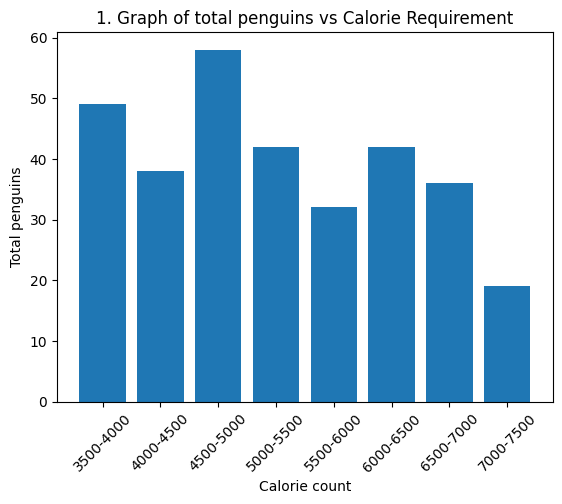

In [10]:
# Plot 1 : Number of penguins in calorie requirement range

# Reusing the code from my Assignment 0, Part 4.8

bins = [3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500] 
labels=["3500-4000", "4000-4500", "4500-5000", "5000-5500", "5500-6000", "6000-6500", "6500-7000", "7000-7500"]

penguin_data["calorie_range"] = pd.cut(x=penguin_data["calorie requirement"], bins=bins, labels=labels)

mass_group = penguin_data.groupby("calorie_range")["calorie requirement"].count().tolist()

plt.bar(labels, mass_group)
plt.title("1. Graph of total penguins vs Calorie Requirement")
plt.xlabel("Calorie count")
plt.ylabel("Total penguins")
plt.xticks(rotation=45)
plt.show()

penguin_data = penguin_data.drop("calorie_range", axis=1)

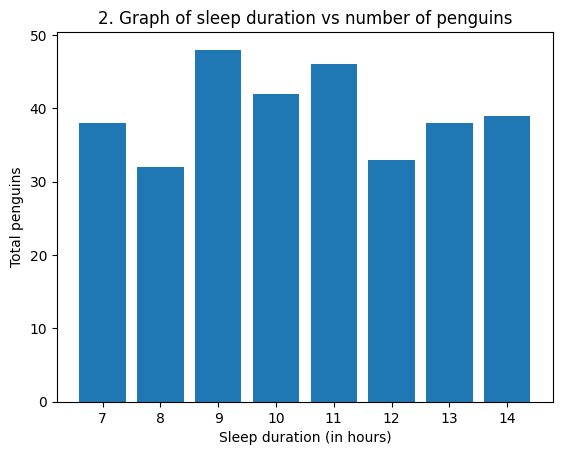

In [11]:
# Plot 2 : Average Sleep Duration

sleep_duration = sorted(penguin_data['average sleep duration'].unique().tolist())

n_penguins = []

for item in sleep_duration:
    count = (penguin_data['average sleep duration'] == item).sum() 
    n_penguins.append(int(count))  

plt.bar(sleep_duration, n_penguins)
plt.title("2. Graph of sleep duration vs number of penguins")
plt.xlabel("Sleep duration (in hours)")
plt.ylabel("Total penguins")
plt.show()

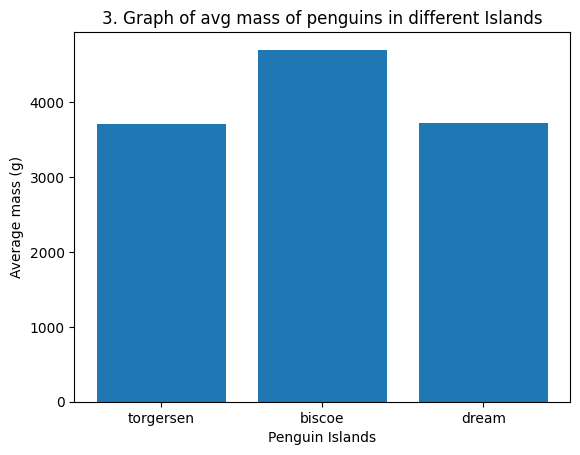

In [12]:
# Plot 3 : Average Mass vs Island

penguin_island = penguin_data['island'].unique().tolist()

penguin_island.remove('na')

avg_mass_island = []

for item in penguin_island:
    count = float(penguin_data[penguin_data['island'] == item]['body_mass_g'].mean())
    avg_mass_island.append(count)

plt.bar(penguin_island, avg_mass_island)
plt.title("3. Graph of avg mass of penguins in different Islands")
plt.xlabel("Penguin Islands")
plt.ylabel("Average mass (g)")
plt.show()

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/1294948339.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_adelie.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'adelie'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/1294948339.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_gentoo.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'gentoo'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/1294948339.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_chinstrap.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'chinstrap'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/1294948339.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_

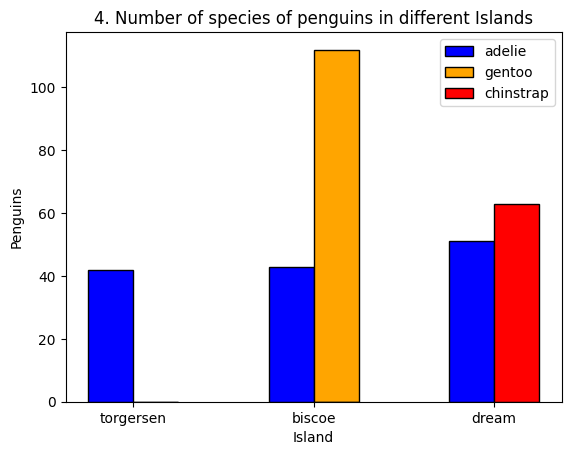

In [13]:
# Plot 4. Graph of number of species of penguins in different Islands

penguin_species = penguin_data['species'].unique()

species_adelie = []
species_gentoo = []
species_chinstrap = []

for item in penguin_island:
    species_adelie.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'adelie'].shape[0])
    species_gentoo.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'gentoo'].shape[0])
    species_chinstrap.append(penguin_data[penguin_data['island'] == item][penguin_data['species'] == 'chinstrap'].shape[0])

r1 = np.arange(len(penguin_island))
width = 0.25

plt.bar(r1, species_adelie, width=width, label='adelie', edgecolor = 'black', color='blue')
plt.bar(r1 + width, species_gentoo, width=width, label='gentoo', edgecolor = 'black', color='orange')
plt.bar(r1 + width, species_chinstrap, width=width, label='chinstrap', edgecolor = 'black', color='red')

plt.xlabel('Island')
plt.ylabel('Penguins')
plt.title('4. Number of species of penguins in different Islands')
plt.xticks(r1 + width/2, penguin_island)
plt.legend()
plt.show()

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/171902763.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_male.append(penguin_data[penguin_data['species'] == item][penguin_data['gender'] == 'male'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/171902763.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_female.append(penguin_data[penguin_data['species'] == item][penguin_data['gender'] == 'female'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/171902763.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_male.append(penguin_data[penguin_data['species'] == item][penguin_data['gender'] == 'male'].shape[0])
/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/171902763.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  species_female.append(penguin_

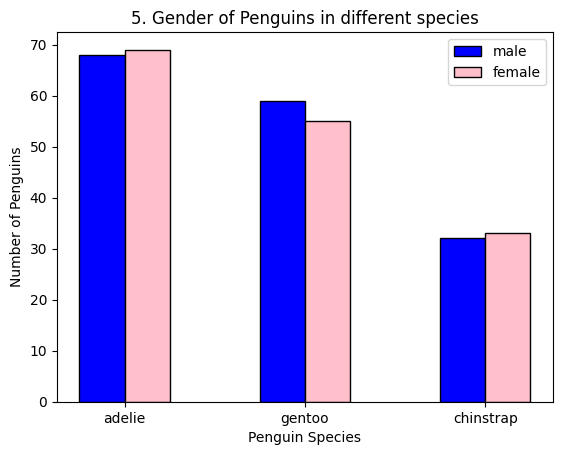

In [14]:
# Plot 5 : Gender of Penguins in different species

species_male = []
species_female = []

for item in penguin_species:
    species_male.append(penguin_data[penguin_data['species'] == item][penguin_data['gender'] == 'male'].shape[0])
    species_female.append(penguin_data[penguin_data['species'] == item][penguin_data['gender'] == 'female'].shape[0])

r1 = np.arange(len(penguin_species))
width = 0.25

plt.bar(r1, species_male, width=width, label='male', edgecolor = 'black', color='blue')
plt.bar(r1 + width, species_female, width=width, label='female', edgecolor = 'black', color='pink')

plt.xlabel('Penguin Species')
plt.ylabel('Number of Penguins')
plt.title('5. Gender of Penguins in different species')
plt.xticks(r1 + width/2, penguin_species)
plt.legend()
plt.show()


In [15]:
## Convert featues with string type to categorial

copy_penguin_data = pd.get_dummies(penguin_data, columns=['species', 'island', 'gender'])

In [16]:
# Print correlation matric

corr_matrix_penguin = copy_penguin_data.corr()

corr_matrix_penguin

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_na,island_torgersen,gender_female,gender_male
calorie requirement,1.000000,-0.055561,0.012164,-0.054363,0.007251,0.029855,-0.015639,0.022768,-0.091861,0.053826,0.049532,-0.070592,-0.005460,0.028926,0.006217,-0.006217
average sleep duration,-0.055561,1.000000,0.021578,0.039558,0.060812,0.077066,0.015882,0.029560,-0.049250,0.010950,0.009839,-0.039071,-0.005303,0.042729,-0.080561,0.080561
bill_length_mm,0.012164,0.021578,1.000000,-0.017268,0.404342,0.325466,0.039123,-0.604892,0.401720,0.286084,0.053639,0.039918,0.338653,-0.259942,-0.143923,0.143923
bill_depth_mm,-0.054363,0.039558,-0.017268,1.000000,-0.111613,-0.074932,-0.086930,0.106307,0.070997,-0.169463,-0.123297,0.095595,-0.017140,0.052637,-0.162475,0.162475
flipper_length_mm,0.007251,0.060812,0.404342,-0.111613,1.000000,0.869365,0.165145,-0.680270,-0.179474,0.853070,0.572575,-0.408062,0.025524,-0.275309,-0.276034,0.276034
body_mass_g,0.029855,0.077066,0.325466,-0.074932,0.869365,1.000000,0.045116,-0.544957,-0.301192,0.815886,0.600829,-0.455760,0.016289,-0.246046,-0.440297,0.440297
year,-0.015639,0.015882,0.039123,-0.086930,0.165145,0.045116,1.000000,0.000499,-0.051158,0.042546,0.071547,-0.063252,0.023389,-0.024482,-0.007421,0.007421
species_adelie,0.022768,0.029560,-0.604892,0.106307,-0.680270,-0.544957,0.000499,1.000000,-0.445198,-0.657220,-0.309119,0.020956,-0.059755,0.447523,0.011923,-0.011923
species_chinstrap,-0.091861,-0.049250,0.401720,0.070997,-0.179474,-0.301192,-0.051158,-0.445198,1.000000,-0.382293,-0.499313,0.644791,0.060951,-0.199237,0.011050,-0.011050
species_gentoo,0.053826,0.010950,0.286084,-0.169463,0.853070,0.815886,0.042546,-0.657220,-0.382293,1.000000,0.739275,-0.564356,0.010361,-0.294121,-0.021605,0.021605


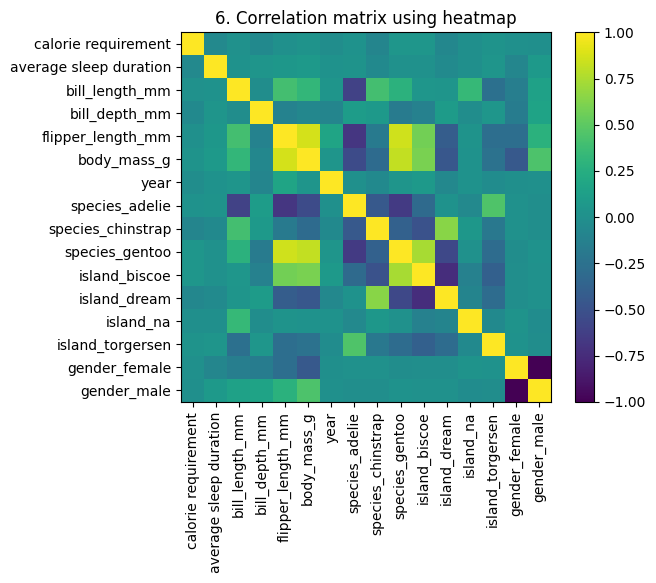

In [17]:
# Plot 6 : Plot of Correlation matrix using heatmap

# Reusing code from Assignment 0, Part 4.2

img = plt.imshow(corr_matrix_penguin)
plt.colorbar(img)
plt.xticks(ticks=np.arange(len(corr_matrix_penguin.columns)), labels=corr_matrix_penguin.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix_penguin.columns)), labels=corr_matrix_penguin.columns)


plt.title("6. Correlation matrix using heatmap")
plt.show()

7. Identify unrelated feature

- From the above correlation matrix, columns = 'calorie requirement', 'average sleep requirement' and 'year' are highly unrelated
- Need to drop those columns

In [18]:
copy_penguin_data = copy_penguin_data.drop(columns=['calorie requirement', 'average sleep duration', 'year'])

copy_penguin_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_na,island_torgersen,gender_female,gender_male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True,False,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,False,True,False,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True,False,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True,False,False,False,True


8. Normalize non-categorial features


In [19]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

9. Map True and False value to 1 and 0 respectively for easy calculation

In [20]:
for columns in ['species_adelie', 'species_chinstrap', 'species_gentoo', 'island_biscoe', 'island_dream', 'island_na', 'island_torgersen', 'gender_female', 'gender_male']:
    copy_penguin_data[columns] = copy_penguin_data[columns].map({True: 1, False:0})

copy_penguin_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_na,island_torgersen,gender_female,gender_male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,0,1
340,43.5,18.1,202.0,3400.0,0,1,0,0,1,0,0,1,0
341,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,0,1
342,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,0,1


10. Save dataset

In [22]:
# ! mkdir preprocessed
copy_penguin_data.to_csv('./preprocessed/penguins_preprocessed.csv', index=False)

#
#
### 2) Dataset : Wine Quality Dataset

1. Read, preprocess and print important statistics of the dataset

In [23]:
# Replace ';' with ',' because it is comma separated values

# For red fine
with open( "./datasets/wine_quality/winequality-red.csv", 'r') as file:
    data = file.read()

data = data.replace(';', ',')

with open("./datasets/wine_quality/winequality-red.csv", 'w') as file:
    file.write(data)

# For white wine
with open( "./datasets/wine_quality/winequality-white.csv", 'r') as file:
    data = file.read()

data = data.replace(';', ',')

with open("./datasets/wine_quality/winequality-white.csv", 'w') as file:
    file.write(data)

In [25]:
# Read and print important statistics

redwine_data = pd.read_csv("./datasets/wine_quality/winequality-red.csv")

whitewine_data = pd.read_csv("./datasets/wine_quality/winequality-white.csv")

print(f"Shape of red wine data is {redwine_data.shape}")

print(f"Shape of white wine data is {whitewine_data.shape}")
# redwine_data[:20]

Shape of red wine data is (1599, 12)
Shape of white wine data is (4898, 12)


2. Combine both datastets into one

In [26]:
# Combine Redwine and Whitewine data into one, white = 1, red = 0 (classification problem)

redwine_data["wine_type_white"] = 0
redwine_data["wine_type_red"] = 1

whitewine_data["wine_type_white"] = 1
whitewine_data["wine_type_red"] =    0

wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white,wine_type_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


3. Handling missing data and Outliners

- No missing data found

In [27]:
# Using print_nan() function from penguin part

print_nan(wine_data)

fixed acidity 0
volatile acidity 0
citric acid 0
residual sugar 0
chlorides 0
free sulfur dioxide 0
total sulfur dioxide 0
density 0
pH 0
sulphates 0
alcohol 0
quality 0
wine_type_white 0
wine_type_red 0


In [28]:
wine_data.columns.unique()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_white',
       'wine_type_red'],
      dtype='object')

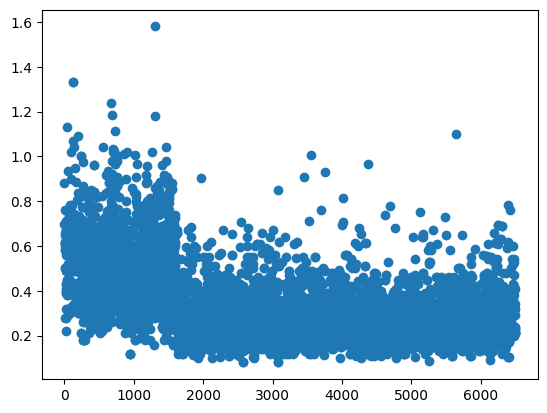

In [29]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['volatile acidity'])) # > 1.3

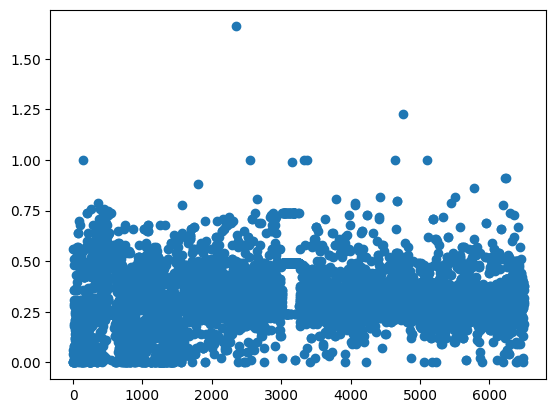

In [30]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['citric acid'])) # > 1

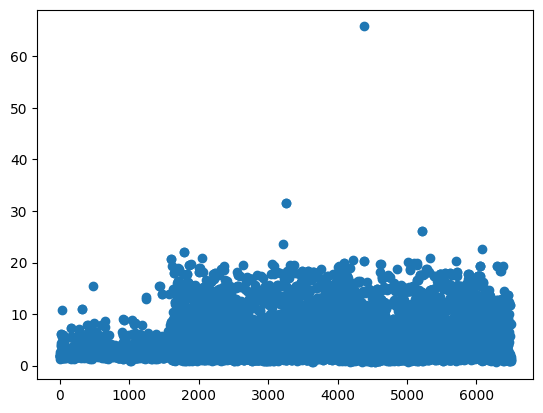

In [31]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['residual sugar'])) # > 30

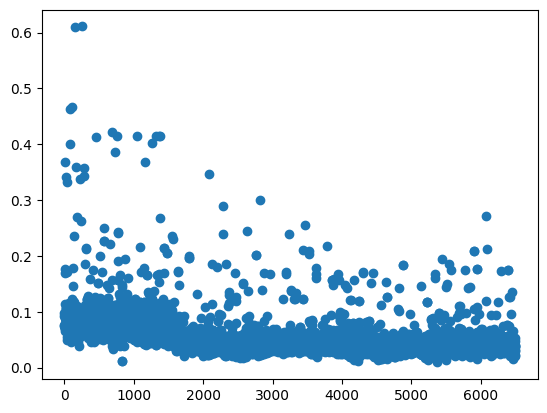

In [32]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['chlorides'])) # > 0.5

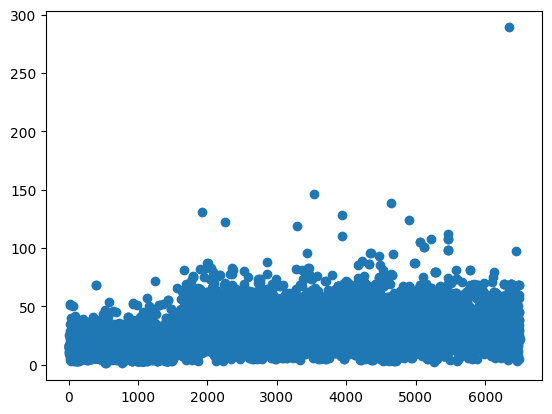

In [33]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['free sulfur dioxide'])) # > 150

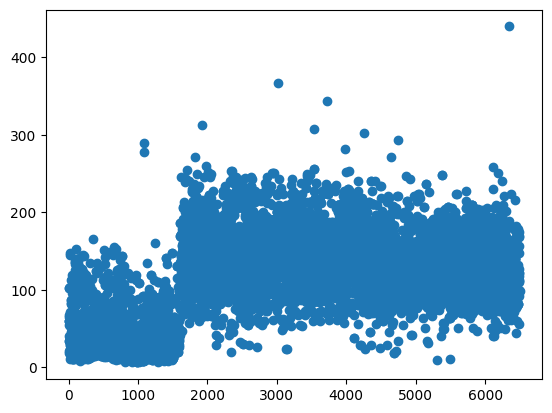

In [34]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['total sulfur dioxide'])) # > 300

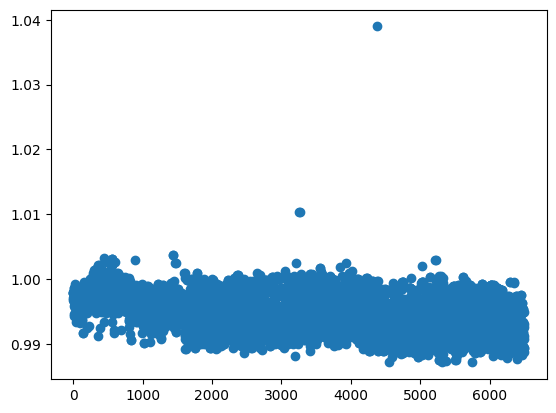

In [35]:
plt.scatter(list(range(0, wine_data.shape[0])), list(wine_data['density'])) # > 1.01

In [36]:
# Replace volatile acidity with median value
wine_data.loc[wine_data['volatile acidity'] > 1.3, 'volatile acidity'] = wine_data['volatile acidity'].median()

# Replace citric acid with median value
wine_data.loc[wine_data['citric acid'] > 1, 'citric acid'] = wine_data['citric acid'].median()

# Replace residual sugar with median value
wine_data.loc[wine_data['residual sugar'] > 30, 'residual sugar'] = wine_data['residual sugar'].median()

# Replace chlorides with median value
wine_data.loc[wine_data['chlorides'] > 0.5, 'chlorides'] = wine_data['chlorides'].median()

# Replace free sulfur dioxide with median value
wine_data.loc[wine_data['free sulfur dioxide'] > 150, 'free sulfur dioxide'] = wine_data['free sulfur dioxide'].median()

# Replace total sulfur dioxide with median value
wine_data.loc[wine_data['total sulfur dioxide'] > 300, 'total sulfur dioxide'] = wine_data['total sulfur dioxide'].median()

# Replace density with aveage value
wine_data.loc[wine_data['density'] > 1.01, 'density'] = wine_data['density'].mean()

In [37]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white,wine_type_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339147,0.318284,5.424765,0.055860,30.485301,115.534324,0.994685,3.218501,0.531268,10.491801,5.818378,0.753886,0.246114
std,1.296434,0.162995,0.143918,4.676288,0.033656,17.457242,56.069126,0.002935,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000,1.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,0.000000
max,15.900000,1.240000,1.000000,26.050000,0.467000,146.500000,294.000000,1.003690,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


4. Plot Graphs

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_white',
       'wine_type_red'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_white',
       'wine_type_red'],
      dtype='object')


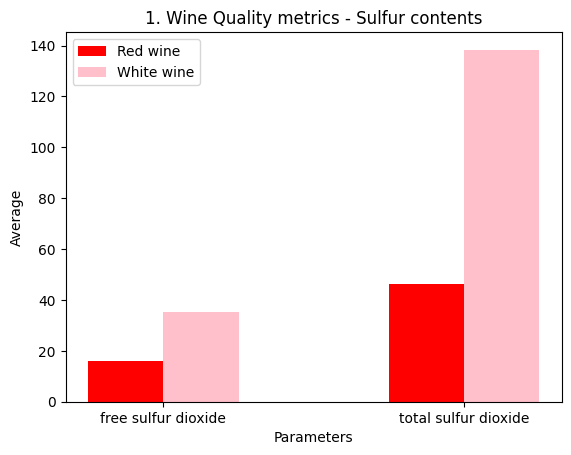

In [38]:
# Plot 1 : Wine quality metrics - Sulfur contents

metrics_red = []
metrics_white = []

print(redwine_data.columns)
print(whitewine_data.columns)

columns_to_consider = ['free sulfur dioxide', 'total sulfur dioxide']

for c in columns_to_consider:
    metrics_red.append(redwine_data[c].mean())

for c in columns_to_consider:
    metrics_white.append(whitewine_data[c].mean())

r1 = np.arange(len(metrics_red))
width = 0.25

plt.bar(r1, metrics_red, width=width, label='Red wine', color='red')
plt.bar(r1 + width, metrics_white, width=width, label='White wine', color='pink')

plt.xlabel('Parameters')
plt.ylabel('Average')
plt.title('1. Wine Quality metrics - Sulfur contents')
plt.xticks(r1 + width/2, columns_to_consider)
plt.legend()
# plt.tight_layout()
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_white',
       'wine_type_red'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_white',
       'wine_type_red'],
      dtype='object')


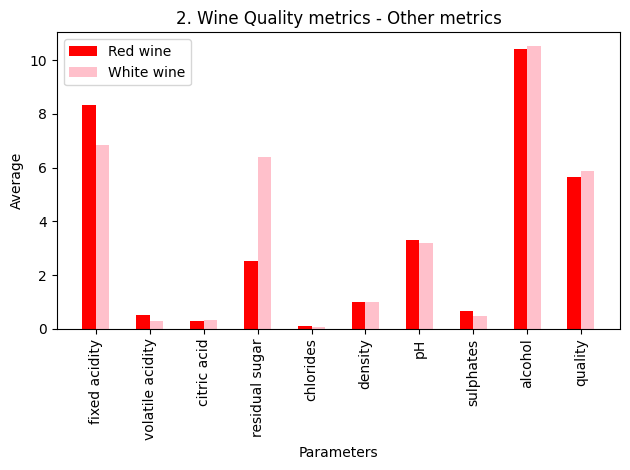

In [39]:
# Plot 2 : Wine quality metrics - Other metrics

metrics_red = []
metrics_white = []

print(redwine_data.columns)
print(whitewine_data.columns)

columns_to_consider = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for c in columns_to_consider:
    metrics_red.append(redwine_data[c].mean())

for c in columns_to_consider:
    metrics_white.append(whitewine_data[c].mean())

r1 = np.arange(len(metrics_red))
width = 0.25

plt.bar(r1, metrics_red, width=width, label='Red wine', color='red')
plt.bar(r1 + width, metrics_white, width=width, label='White wine', color='pink')

plt.xlabel('Parameters')
plt.ylabel('Average')
plt.title('2. Wine Quality metrics - Other metrics')
plt.xticks(r1 + width/2, columns_to_consider, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/259154582.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mass_group = wine_data.groupby("alcohol_range")["quality"].mean().tolist()


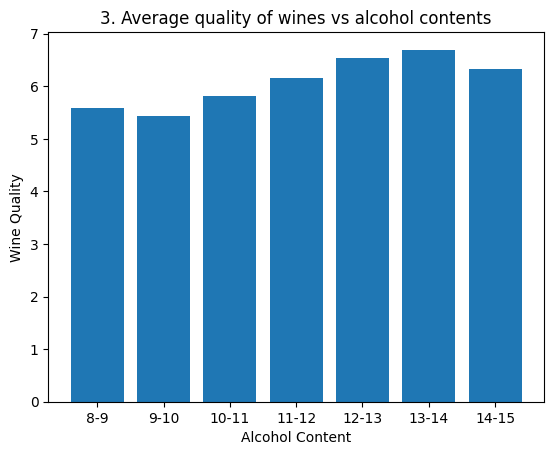

In [40]:
# Plot 3 : Average quality of wines vs alcohol contents

# Reusing the code from my Assignment 0, Part 4.8

bins = [8, 9, 10, 11, 12, 13, 14, 15] 
labels=["8-9", "9-10", "10-11", "11-12", "12-13", "13-14", "14-15"]

wine_data["alcohol_range"] = pd.cut(x=wine_data["alcohol"], bins=bins, labels=labels)

mass_group = wine_data.groupby("alcohol_range")["quality"].mean().tolist()

plt.bar(labels, mass_group)
plt.title("3. Average quality of wines vs alcohol contents")
plt.xlabel("Alcohol Content")
plt.ylabel("Wine Quality")
# plt.xticks(rotation=45)
plt.show()

# wine_data = wine_data.drop("alcohol_range", axis=1)

In [41]:
wine_data = wine_data.drop("alcohol_range", axis=1)

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/235980649.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mass_group = wine_data.groupby("sugar_range")["quality"].mean().tolist()


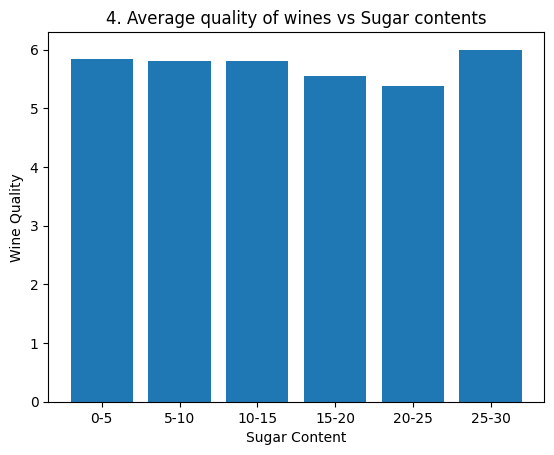

In [42]:
# Plot 4 : Average quality of wines vs residual sugar

# Reusing the code from my Assignment 0, Part 4.8

bins = [0, 5, 10, 15, 20, 25, 30] 
labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"]

wine_data["sugar_range"] = pd.cut(x=wine_data["residual sugar"], bins=bins, labels=labels)

mass_group = wine_data.groupby("sugar_range")["quality"].mean().tolist()

plt.bar(labels, mass_group)
plt.title("4. Average quality of wines vs Sugar contents")
plt.xlabel("Sugar Content")
plt.ylabel("Wine Quality")
# plt.xticks(rotation=45)
plt.show()

In [43]:
wine_data = wine_data.drop("sugar_range", axis=1)

In [44]:
# Print correlation matric

corr_matrix_wine = wine_data.corr()

corr_matrix_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white,wine_type_red
fixed acidity,1.000000,0.219436,0.327094,-0.115860,0.305498,-0.285495,-0.332529,0.466931,-0.252700,0.299568,-0.095452,-0.076743,-0.486740,0.486740
volatile acidity,0.219436,1.000000,-0.376685,-0.206847,0.388124,-0.356076,-0.416940,0.269967,0.258088,0.229946,-0.039109,-0.262603,-0.654043,0.654043
citric acid,0.327094,-0.376685,1.000000,0.144008,0.022949,0.136317,0.196411,0.098093,-0.332236,0.057232,-0.014816,0.085859,0.187832,-0.187832
residual sugar,-0.115860,-0.206847,0.144008,1.000000,-0.134379,0.420176,0.504309,0.535168,-0.273383,-0.189460,-0.365103,-0.038447,0.352645,-0.352645
chlorides,0.305498,0.388124,0.022949,-0.134379,1.000000,-0.202714,-0.288193,0.378369,0.056745,0.373741,-0.262716,-0.201102,-0.524649,0.524649
free sulfur dioxide,-0.285495,-0.356076,0.136317,0.420176,-0.202714,1.000000,0.716962,0.030497,-0.151453,-0.193286,-0.182864,0.063791,0.478227,-0.478227
total sulfur dioxide,-0.332529,-0.416940,0.196411,0.504309,-0.288193,0.716962,1.000000,0.028753,-0.240856,-0.279535,-0.267427,-0.033426,0.703869,-0.703869
density,0.466931,0.269967,0.098093,0.535168,0.378369,0.030497,0.028753,1.000000,0.010159,0.264281,-0.701641,-0.313302,-0.401363,0.401363
pH,-0.252700,0.258088,-0.332236,-0.273383,0.056745,-0.151453,-0.240856,0.010159,1.000000,0.192123,0.121248,0.019506,-0.329129,0.329129
sulphates,0.299568,0.229946,0.057232,-0.189460,0.373741,-0.193286,-0.279535,0.264281,0.192123,1.000000,-0.003029,0.038485,-0.487218,0.487218


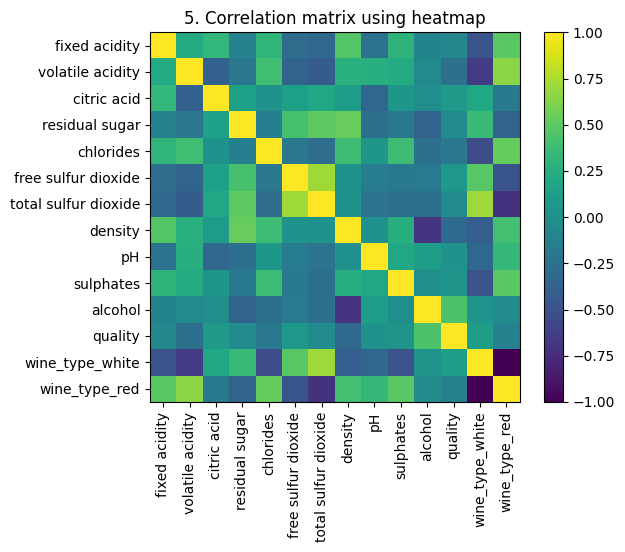

In [45]:
# Plot 5 : Plot of Correlation matrix using heatmap

# Reusing code from Assignment 0, Part 4.2

img = plt.imshow(corr_matrix_wine)
plt.colorbar(img)
plt.xticks(ticks=np.arange(len(corr_matrix_wine.columns)), labels=corr_matrix_wine.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix_wine.columns)), labels=corr_matrix_wine.columns)


plt.title("5. Correlation matrix using heatmap")
plt.show()

5. Save dataset

In [46]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white,wine_type_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339147,0.318284,5.424765,0.055860,30.485301,115.534324,0.994685,3.218501,0.531268,10.491801,5.818378,0.753886,0.246114
std,1.296434,0.162995,0.143918,4.676288,0.033656,17.457242,56.069126,0.002935,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000,1.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,0.000000
max,15.900000,1.240000,1.000000,26.050000,0.467000,146.500000,294.000000,1.003690,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [47]:
# Shuffle the rows
shuffled_data = wine_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [48]:
shuffled_data.to_csv('./preprocessed/wine_data_preprocessed.csv', index=False)

5. Normalize

In [50]:
# Reuse Normalization function from penguin part

# for column in ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']:
#     wine_data[column] = normalize(wine_data[column])

# wine_data


#
#
### 3) Dataset : Emissions by Country

1. Read, preprocess and describe the statistics of dataset

In [49]:
emission_data = pd.read_csv("./datasets/emissions_by_country.csv")

print(f"Shape of emission data is {emission_data.shape}")

emission_data.describe()

Shape of emission data is (63104, 13)


,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [50]:
emission_data[:5]

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Handling Missing values

In [51]:
# For many countries there is no pollution data before 1990,
# So I am selecting data from 1990 onwards to 2021

copy_emission_data  = emission_data[emission_data['Year'] >= 1990]
copy_emission_data  = copy_emission_data[emission_data['Year'] <= 2021]
copy_emission_data.describe()

/var/folders/xs/nhb_5fz94td50ytsrsq2jc9h0000gn/T/ipykernel_11552/3130497552.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_emission_data  = copy_emission_data[emission_data['Year'] <= 2021]


,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,7172.000000,7134.000000,7172.000000,7172.000000,6690.000000,6659.000000,6637.000000,6444.000000,6642.000000,1486.000000,7024.000000
mean,2005.454685,270.304234,49.339654,38983.579615,122.332491,121.293912,73.198873,23.835470,17.214380,111.723412,28.136554
std,9.239453,2106.838977,17.233120,10989.811529,924.497315,784.644919,450.662736,198.609319,173.379033,463.227534,226.656087
min,1990.000000,0.000000,20.000000,20007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,0.582576,34.000000,29441.500000,0.000000,0.703488,0.000000,0.000000,0.000000,0.510344,0.529360
50%,2005.000000,5.468986,49.000000,39001.000000,0.040306,3.876300,0.021984,0.318761,0.000000,1.199101,2.555970
75%,2013.000000,50.301815,64.000000,48465.250000,6.676252,25.606243,11.696635,1.782995,0.244073,4.486268,6.789227
max,2021.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2962.000000,2983.000000,2981.000000,2977.000000


In [52]:
# Dropping 'ISO 3166-1 alpha-3' and 'Other' column - Not relevant
emission_data = copy_emission_data.drop(columns=['ISO 3166-1 alpha-3', 'Other'])

In [53]:
# Get the country list
emission_data['Country'].unique()

array(['Afghanistan', nan, 'afghanistan', 'Albania', 'Algeria', 'Andorra',
       'andorra', 'ANDORRA', 'Angola', 'Anguilla', 'anguilla',
       'ANTARCTICA', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'ARGENTINA', 'Armenia', 'armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'benin', 'Bermuda',
       'Bhutan', 'Bonaire, Saint Eustatius and Saba',
       'Bosnia and Herzegovina', 'bosnia and herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'brunei darussalam',
       'Brunei Darussalam', 'Bulgaria', 'bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'congo',
       'Cook Islands', 'Costa Rica', "CÔTE D'IVOIRE", "Côte d'Ivoire",
       "côte d'ivoire", 'Croatia', 'CROATIA', 'Cuba', 'Curaçao', 'Cy

In [54]:
# Get missing values - Reusing previous function
print_nan(emission_data)

Country 154
Year 0
Total 38
Temperature 0
GDP Per Capita (USD) 0
Coal 482
Oil 513
Gas 535
Cement 728
Flaring 530
Per Capita 148


In [55]:
# Remove Nan Countries
emission_data = emission_data.dropna(subset=["Country"])

In [56]:
# Convert countries to lower case - Handling mismatched string formats
emission_data['Country'] = emission_data['Country'].str.lower()

In [57]:
# Count of each country data
for countries in emission_data['Country'].unique():
    print(countries, (emission_data["Country"] == countries).sum())

afghanistan 31
albania 31
algeria 28
andorra 32
angola 32
anguilla 32
antarctica 32
antigua and barbuda 23
argentina 31
armenia 32
aruba 31
australia 31
austria 32
azerbaijan 29
bahamas 29
bahrain 32
bangladesh 32
barbados 30
belarus 31
belgium 31
belize 31
benin 27
bermuda 30
bhutan 27
bonaire, saint eustatius and saba 30
bosnia and herzegovina 30
botswana 32
brazil 29
british virgin islands 32
brunei darussalam 31
bulgaria 30
burkina faso 30
burundi 31
cambodia 30
canada 31
cape verde 31
central african republic 29
chad 31
chile 32
china 31
christmas island 31
colombia 29
comoros 29
congo 31
cook islands 30
costa rica 29
côte d'ivoire 31
croatia 31
cuba 30
curaçao 31
cyprus 31
czech republic 28
north korea 32
democratic republic of the congo 32
denmark 29
djibouti 31
dominica 31
dominican republic 30
ecuador 30
egypt 29
el salvador 31
equatorial guinea 27
eritrea 30
estonia 27
ethiopia 29
faeroe islands 32
micronesia (federated states of) 31
fiji 29
finland 31
panama canal zone 30
fr

In [58]:
# Treat '0' values also as NaN values - replace 0 to NaN
emission_data = emission_data.replace(0, np.nan)

In [59]:
# Check for coutries where every value in a particular columns are empty or missing
na_country = set()
for country in emission_data['Country'].unique():
    country_data = emission_data[emission_data['Country'] == country]
    for c in ['Total', 'Per Capita', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring']:
        if not country_data[c].notna().any():
            na_country.add(country)

print(na_country)

# Drop those countries
copy_emission_data = emission_data[~emission_data['Country'].isin(list(na_country))]

copy_emission_data

{'paraguay', 'cambodia', 'jamaica', 'cape verde', 'cyprus', 'niue', 'niger', 'bhutan', 'north korea', 'vanuatu', 'montserrat', 'kuwait', 'pacific islands (palau)', 'laos', 'congo', 'mongolia', 'french guiana', 'zambia', 'martinique', 'french equatorial africa', 'lebanon', 'tuvalu', 'montenegro', 'madagascar', 'south sudan', 'guinea', 'belize', 'liechtenstein', 'st. kitts-nevis-anguilla', 'namibia', 'sierra leone', 'cook islands', 'honduras', 'botswana', 'brunei darussalam', 'sint maarten (dutch part)', 'togo', 'christmas island', 'liberia', 'international transport', 'mauritius', 'faeroe islands', 'malawi', 'mayotte', "côte d'ivoire", 'saint kitts and nevis', 'panama canal zone', 'réunion', 'angola', 'malta', 'turks and caicos islands', 'suriname', 'nicaragua', 'curaçao', 'marshall islands', 'comoros', 'andorra', 'saint pierre and miquelon', 'somalia', 'burundi', 'uruguay', 'kuwaiti oil fires', 'eritrea', 'saudi arabia', 'sao tome and principe', 'bahrain', 'nauru', 'tonga', 'puerto ric

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
240,afghanistan,1990.0,2.024326,79,50812,0.278464,1.271408,0.403040,0.045766,0.025648,0.189281
241,afghanistan,1991.0,1.914301,63,56235,0.249627,1.204085,0.389125,0.045766,0.025697,0.178155
242,afghanistan,1992.0,1.482054,29,44611,0.021984,1.029584,0.362736,0.045766,0.021984,0.122916
243,afghanistan,1993.0,1.486943,52,25687,0.018320,1.047904,NaN,NaN,1251.000000,0.106182
244,afghanistan,1994.0,1.453829,46,24621,0.014693,1.032171,0.337935,0.046991,0.022039,0.094065
...,...,...,...,...,...,...,...,...,...,...,...
63099,global,2017.0,36096.739276,22,32659,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
63100,global,2018.0,36826.506600,44,21696,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
63101,global,2019.0,37082.558969,78,52918,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
63102,global,2020.0,35264.085734,34,39808,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [60]:
# Handle missing values - Replace missing value in ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring'] as Median 
# And ['Total', 'Per Capita'] as Mean
emission_data = copy_emission_data
for country in emission_data['Country'].unique():
    country_data = emission_data[emission_data['Country'] == country]

    for c in ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']:
        emission_data.loc[emission_data['Country'] == country, c] = country_data[c].fillna(country_data[c].median())

    for c in ['Total', 'Per Capita']:
        emission_data.loc[emission_data['Country'] == country, c] = country_data[c].fillna(country_data[c].mean())
    


In [61]:
# check for missing value once again
print_nan(emission_data)

Country 0
Year 0
Total 0
Temperature 0
GDP Per Capita (USD) 0
Coal 0
Oil 0
Gas 0
Cement 0
Flaring 0
Per Capita 0


In [62]:
emission_data['Country'].unique().shape

(102,)

In [63]:
# Get Top poluted countries 
country_list = emission_data['Country'].unique()

temp = {}
for c in country_list:
    total_avg_pollution = float(emission_data[emission_data['Country'] == c]['Total'].mean())
    temp[c] = total_avg_pollution

top_polluted_countries = dict(sorted(temp.items(), key=lambda item: item[1], reverse=True))

list_top = list(top_polluted_countries.keys())
print(list_top)

['global', 'china', 'usa', 'russia', 'india', 'japan', 'germany', 'canada', 'united kingdom', 'south korea', 'iran', 'italy', 'mexico', 'south africa', 'brazil', 'france', 'indonesia', 'australia', 'poland', 'ukraine', 'spain', 'turkey', 'taiwan', 'kazakhstan', 'thailand', 'iraq', 'malaysia', 'netherlands', 'egypt', 'argentina', 'venezuela', 'switzerland', 'united arab emirates', 'pakistan', 'norway', 'viet nam', 'czech republic', 'algeria', 'belgium', 'uzbekistan', 'romania', 'croatia', 'greece', 'nigeria', 'philippines', 'afghanistan', 'armenia', 'colombia', 'austria', 'belarus', 'chile', 'qatar', 'israel', 'hungary', 'finland', 'portugal', 'sweden', 'bulgaria', 'libya', 'denmark', 'turkmenistan', 'costa rica', 'serbia', 'bangladesh', 'syria', 'slovakia', 'ireland', 'peru', 'azerbaijan', 'new zealand', 'ecuador', 'cuba', 'tunisia', 'jordan', 'estonia', 'lithuania', 'bosnia and herzegovina', 'yemen', 'slovenia', 'bolivia', 'myanmar', 'guatemala', 'luxembourg', 'north macedonia', 'ghan

In [64]:
emission_data[emission_data['Country'] == 'russia'].describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2006.642857,1628.883099,47.392857,41867.607143,425.371769,372.564096,756.117374,20.624580,37.887221,11.188947
std,9.023485,109.159627,18.791920,12071.416528,36.655176,60.140081,49.704737,4.693784,13.332435,0.735999
min,1992.000000,1464.542998,21.000000,20309.000000,366.758617,308.253748,669.081408,11.922667,18.666652,9.917491
25%,1998.750000,1554.750552,30.750000,31024.500000,401.683988,333.536160,725.181403,16.998725,24.169597,10.695481
50%,2006.500000,1625.471944,41.500000,44404.500000,416.579634,353.725222,769.139570,20.748035,37.545454,11.277417
75%,2014.250000,1660.435123,65.500000,52042.000000,443.302508,398.904669,780.956096,23.855165,48.980226,11.535731
max,2021.000000,1965.610204,76.000000,56846.000000,521.106988,585.184698,875.051751,27.644836,62.654678,13.216354


3. Plot Graphs

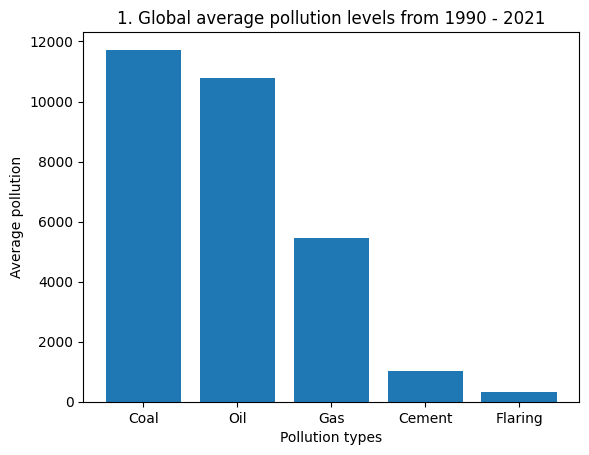

In [65]:
# Plot 1 : Global average pollution levels

columns_to_consider_emissions = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']

avg_pollution = []

for c in columns_to_consider_emissions:
    avg = float(emission_data[emission_data['Country'] == 'global'][c].mean())
    avg_pollution.append(avg)

plt.bar(columns_to_consider_emissions, avg_pollution)
plt.title("1. Global average pollution levels from 1990 - 2021")
plt.xlabel("Pollution types")
plt.ylabel("Average pollution")
plt.show()

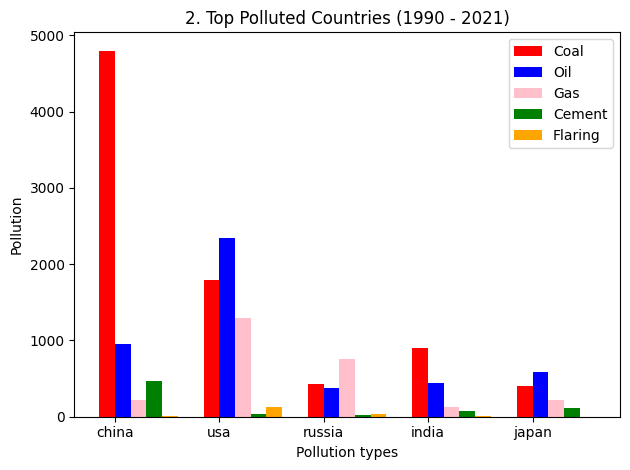

In [66]:
# Plot 2: Top Polluted Countries
coal = []
oil = []
gas = []
cement = []
flaring = []

for item in list_top[1:6]:
    coal.append(float(emission_data[emission_data['Country'] == item]['Coal'].mean()))
    oil.append(float(emission_data[emission_data['Country'] == item]['Oil'].mean()))
    gas.append(float(emission_data[emission_data['Country'] == item]['Gas'].mean()))
    cement.append(float(emission_data[emission_data['Country'] == item]['Cement'].mean()))
    flaring.append(float(emission_data[emission_data['Country'] == item]['Flaring'].mean()))

r1 = np.arange(5)
width = 0.15

plt.bar(r1, coal, width=width, label='Coal', color='red')
plt.bar(r1 + width, oil, width=width, label='Oil', color='blue')
plt.bar(r1 + 2*width, gas, width=width, label='Gas', color='pink')
plt.bar(r1 + 3*width, cement, width=width, label='Cement', color='green')
plt.bar(r1 + 4*width, flaring, width=width, label='Flaring', color='orange')

plt.xlabel('Pollution types')
plt.ylabel('Pollution')
plt.title('2. Top Polluted Countries (1990 - 2021)')
plt.xticks(r1 + width/2, list_top[1:6])
plt.legend()
plt.tight_layout()
plt.show()

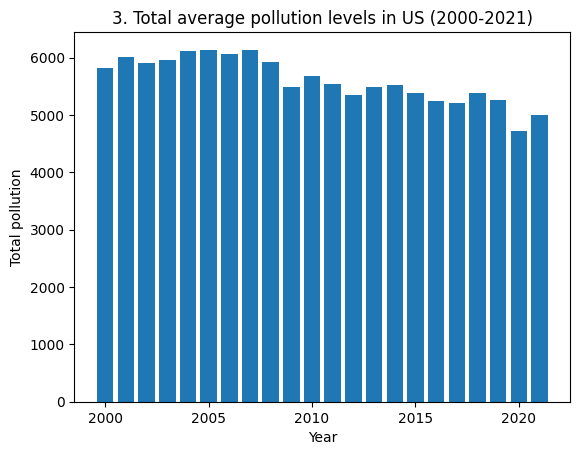

In [67]:
# Plot 3 : US Pollution levels

years = list(range(2000, 2022))

total_pollution_US = list(emission_data[emission_data['Country'] == 'usa']['Total'][-22:])

plt.bar(years, total_pollution_US)
plt.title("3. Total average pollution levels in US (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Total pollution")
plt.show()

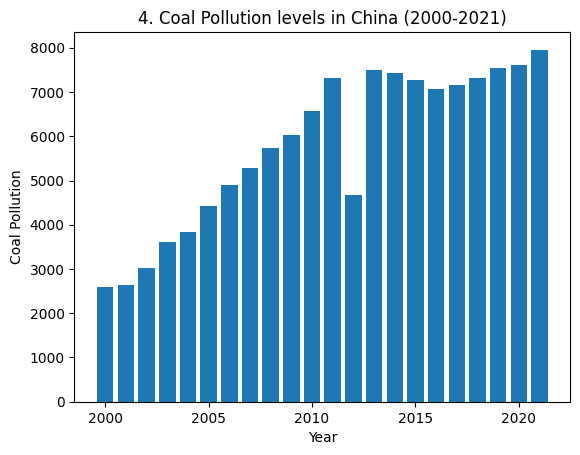

In [68]:
# Plot 4 : Coal Pollution levels in China

total_gdp_US = list(emission_data[emission_data['Country'] == 'china']['Coal'][-22:])

plt.bar(years, total_gdp_US)
plt.title("4. Coal Pollution levels in China (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Coal Pollution")
plt.show()

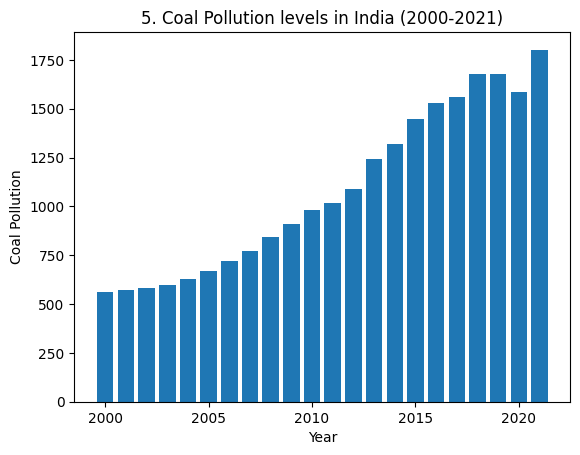

In [ ]:
# Plot 5 : Coal Pollution levels in India

total_gdp_US = list(emission_data[emission_data['Country'] == 'india']['Coal'][-22:])

plt.bar(years, total_gdp_US)
plt.title("5. Coal Pollution levels in India (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Coal Pollution")
plt.show()

In [70]:
# Print correlation matric

copy_emission_data = emission_data.drop(columns=['Country'])

corr_matrix_emission = copy_emission_data.corr()

corr_matrix_emission

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
Year,1.000000,0.033409,-0.017506,-0.027032,0.034844,0.014206,0.037841,0.056259,0.002631,0.006741
Total,0.033409,1.000000,-0.002003,0.023296,0.923625,0.972154,0.859575,0.590753,0.057954,0.000592
Temperature,-0.017506,-0.002003,1.000000,0.009378,-0.004216,0.007120,-0.010740,-0.033946,-0.010601,-0.012272
GDP Per Capita (USD),-0.027032,0.023296,0.009378,1.000000,0.026233,0.020908,0.029795,0.002067,0.021007,-0.019298
Coal,0.034844,0.923625,-0.004216,0.026233,1.000000,0.871291,0.780300,0.578767,0.033843,0.004915
Oil,0.014206,0.972154,0.007120,0.020908,0.871291,1.000000,0.867273,0.546299,0.072956,0.008859
Gas,0.037841,0.859575,-0.010740,0.029795,0.780300,0.867273,1.000000,0.525246,0.288972,0.052282
Cement,0.056259,0.590753,-0.033946,0.002067,0.578767,0.546299,0.525246,1.000000,0.072828,0.120578
Flaring,0.002631,0.057954,-0.010601,0.021007,0.033843,0.072956,0.288972,0.072828,1.000000,0.088915
Per Capita,0.006741,0.000592,-0.012272,-0.019298,0.004915,0.008859,0.052282,0.120578,0.088915,1.000000


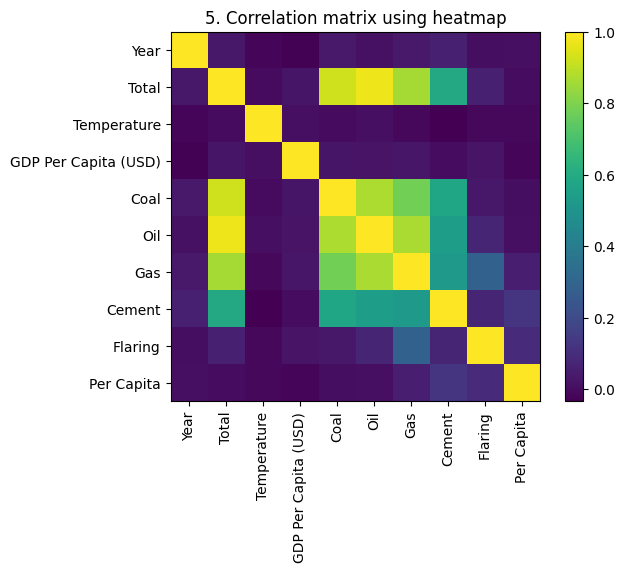

In [71]:
# Plot 6 : Plot of Correlation matrix using heatmap

# Reusing code from Assignment 0, Part 4.2

img = plt.imshow(corr_matrix_emission)
plt.colorbar(img)
plt.xticks(ticks=np.arange(len(corr_matrix_emission.columns)), labels=corr_matrix_emission.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix_emission.columns)), labels=corr_matrix_emission.columns)


plt.title("5. Correlation matrix using heatmap")
plt.show()

4. Remove uncorrelated features

- 'temperature', 'gdp per capita' and 'Total' are uncorrelated features here, so removing them

In [72]:
copy_emission_data = emission_data.drop(columns=['Temperature', 'GDP Per Capita (USD)'])

copy_emission_data

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
240,afghanistan,1990.0,2.024326,0.278464,1.271408,0.403040,0.045766,0.025648,0.189281
241,afghanistan,1991.0,1.914301,0.249627,1.204085,0.389125,0.045766,0.025697,0.178155
242,afghanistan,1992.0,1.482054,0.021984,1.029584,0.362736,0.045766,0.021984,0.122916
243,afghanistan,1993.0,1.486943,0.018320,1.047904,0.298744,0.035550,1251.000000,0.106182
244,afghanistan,1994.0,1.453829,0.014693,1.032171,0.337935,0.046991,0.022039,0.094065
...,...,...,...,...,...,...,...,...,...
63099,global,2017.0,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
63100,global,2018.0,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
63101,global,2019.0,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
63102,global,2020.0,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


5. Normalize

In [75]:
# for column in ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']:
#     copy_emission_data[column] = normalize(copy_emission_data[column])

# copy_emission_data

6. Save Dataset

In [ ]:
copy_emission_data.to_csv('./preprocessed/emissions_preprocessed.csv', index=False)

## REFERENCES

https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/ 

https://www.geeksforgeeks.org/how-to-lowercase-column-names-in-pandas-dataframe/

https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/

https://www.geeksforgeeks.org/python-ways-to-add-row-columns-in-numpy-array/


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html

https://pandas.pydata.org/docs/reference/api/pandas.concat.html


https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
